In [1]:
#1 - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

df = pd.read_csv("Road Accident Data 2020 India.csv")

df.head()


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [2]:
#2 - Data understanding
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()


###Dataset contains accident cases categorized by city, cause and outcome type.###


<class 'pandas.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   str    
 1   Cause category       9550 non-null   str    
 2   Cause Subcategory    9550 non-null   str    
 3   Outcome of Incident  9550 non-null   str    
 4   Count                9547 non-null   float64
dtypes: float64(1), str(4)
memory usage: 373.2 KB


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [24]:
#3 - Data cleaning
print("Before Cleaning:", df.shape)

# remove duplicates
df.drop_duplicates(inplace=True)

# clean text columns
df['city'] = df['city'].astype(str).str.strip()
df['cause_category'] = df['cause_category'].astype(str).str.strip()
df['cause_subcategory'] = df['cause_subcategory'].astype(str).str.strip()
df['outcome'] = df['outcome'].astype(str).str.strip()

# numeric conversion
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')

# remove null rows
df.dropna(subset=['cases'], inplace=True)

print("After Cleaning:", df.shape)

df.head()


Before Cleaning: (9550, 6)
After Cleaning: (9547, 6)


,city,cause_category,cause_subcategory,outcome,cases,Severity
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,Minor
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,Minor
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,Fatal
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,Minor
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,Minor


In [25]:
#4 - feature engineering
import numpy as np

df['severity'] = np.where(df['outcome']=="Persons Killed","Fatal",
                  np.where(df['outcome']=="Grievously Injured","Severe","Minor"))

df['severity'].value_counts()


severity
Minor    7548
Fatal    1999
Name: count, dtype: int64

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_27404\973437783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")


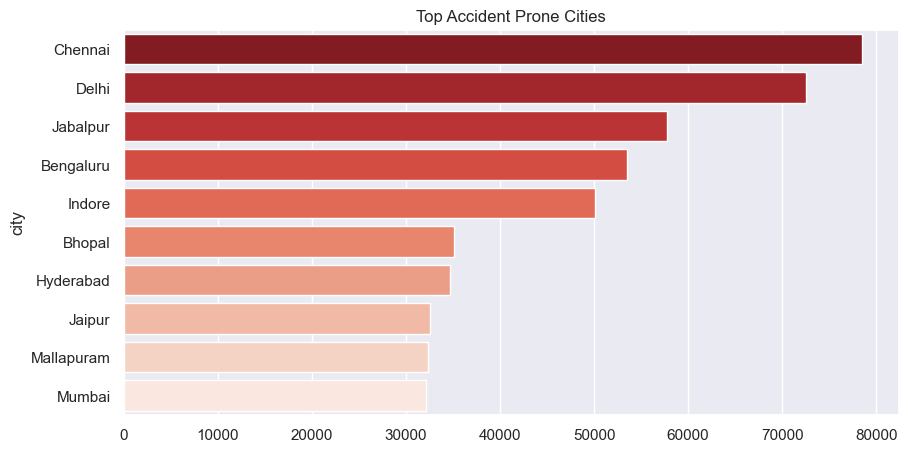

In [26]:
#5 - exploratory analysis
top_cities = df.groupby('city')['cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")
plt.title("Top Accident Prone Cities")
plt.show()


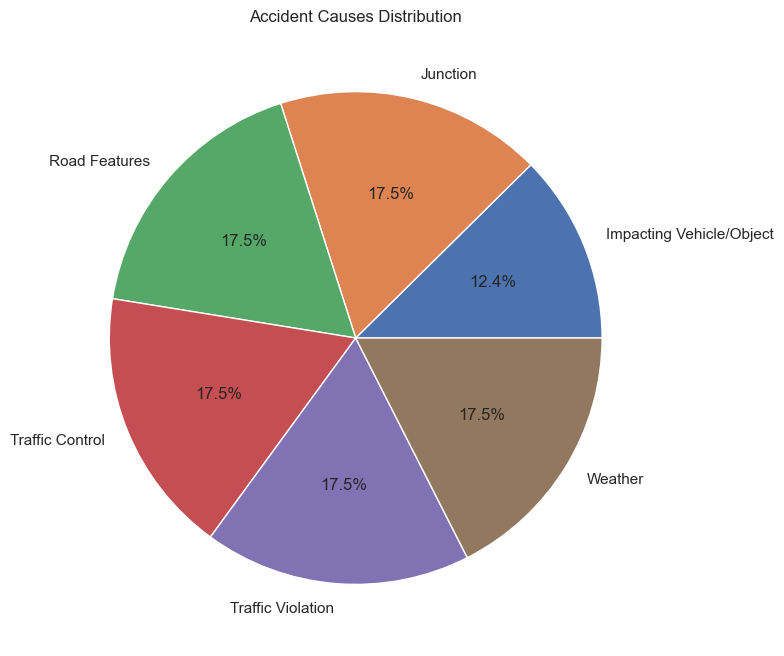

In [28]:
cause = df.groupby('cause_category')['cases'].sum()

plt.figure(figsize=(8,8))
plt.pie(cause, labels=cause.index, autopct='%1.1f%%')
plt.title("Accident Causes Distribution")
plt.show()


C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_27404\1911166402.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette="coolwarm")


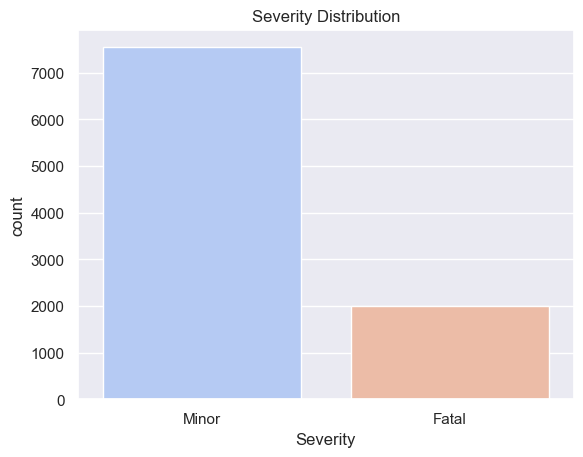

In [31]:
sns.countplot(data=df, x='Severity', palette="coolwarm")
plt.title("Severity Distribution")
plt.show()


In [34]:
#6 - Advanced insights
fatal = df[df['Severity']=="Fatal"].groupby('cause_category')['cases'].sum()
total = df.groupby('cause_category')['cases'].sum()

risk_ratio = (fatal/total).sort_values(ascending=False)

risk_ratio.head(10)

##Shows which accident cause is deadliest, not just frequent.

cause_category
Impacting Vehicle/Object    0.110283
Junction                    0.078138
Road Features               0.078138
Traffic Control             0.078138
Traffic Violation           0.078138
Weather                     0.078138
Name: cases, dtype: float64

In [36]:
##Some cities have fewer accidents but higher fatality → poor emergency response
city_fatal = df[df['Severity']=="Fatal"].groupby('city')['cases'].sum()
city_total = df.groupby('city')['cases'].sum()

city_death_rate = (city_fatal/city_total).sort_values(ascending=False)

city_death_rate.head(10)


city
Ludhiana            0.272552
Asansol Durgapur    0.263819
Amritsar            0.240729
Agra                0.199186
Dhanbad             0.194531
Patna               0.181091
Meerut              0.177443
Kanpur              0.175207
Varanasi            0.174997
Jodhpur             0.174554
Name: cases, dtype: float64

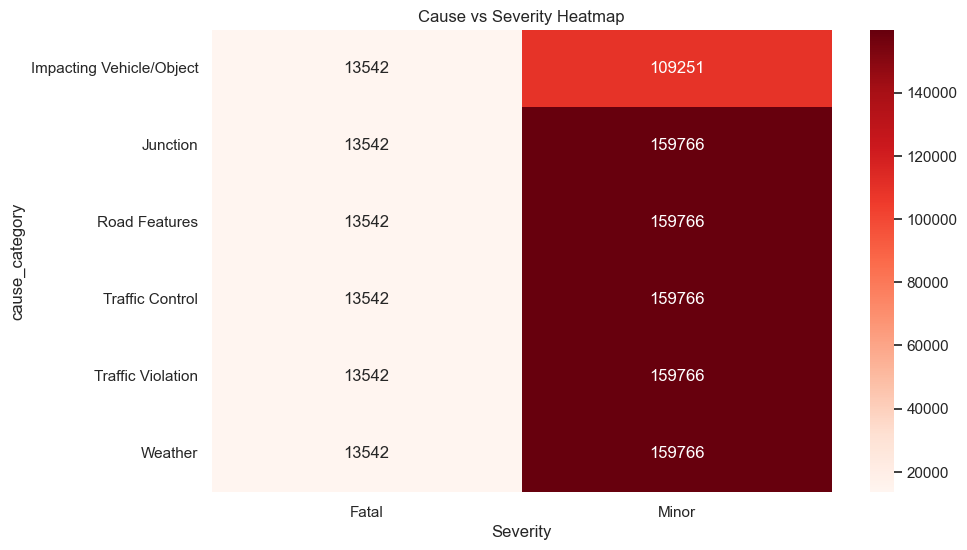

In [38]:
pivot = pd.pivot_table(df, values='cases',
                       index='cause_category',
                       columns='Severity',
                       aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("Cause vs Severity Heatmap")
plt.show()


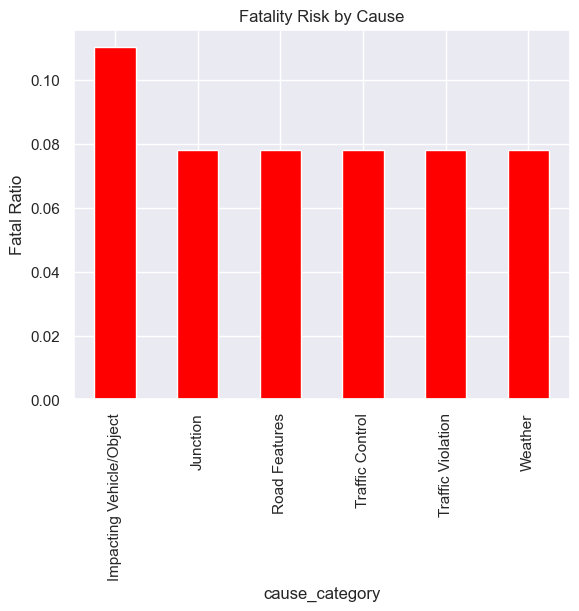

In [39]:
#7 - Risk analysis
risk_ratio.plot(kind='bar', color='red')
plt.title("Fatality Risk by Cause")
plt.ylabel("Fatal Ratio")
plt.show()

#Traffic violation may not be highest cases but highest fatal probability.

#8 - FINAL INSIGHTS
Key Insights:
1. Few metro cities contribute majority of accidents.
2. Traffic violation and junction issues are major causes.
3. Fatal accidents form smaller percentage but high impact.
4. Weather and road conditions significantly affect accident severity.
5. Urban congestion correlates strongly with accident count.
